# Handwriting Recognition

In this project, we will be using **K-Means++** clustering algorithm in scikit-learn inplementation on sklearn digits dataset to cluster images of handwritten digits.

This technology is used in ATMs to recognize handwritten bank checks, Evernote uses it to recognize handwritten task lists, moreover - the U.S. Postal Service has been using machine learning and scanning technologies since 1999. Its postal offices have to look at roughly half a billion pieces of mail every day, so they have done extensive research and developed very efficient algorithms for reading and understanding addresses.


## Getting Started with the Digits Dataset

Let's start by performing necessary imports. 

In [1]:
# Basic imports related to analysis
import numpy as np

# Imports for visualisationin
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

# Imports for ml 
from sklearn.cluster import KMeans

# Data related imports
from sklearn import datasets

It’s always a good idea to go through the data description and see what you can already learn.

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Let’s see what the data looks like.

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Each list contains 64 values which respent the pixel colors of an image (0-16):
- `0` is white;
- `16` is black.

In [4]:
print(digits.target)

[0 1 2 ... 8 9 8]


This shows us that the first data point in the set was tagged as a 0 and the last one was tagged as an 8.

To visualize the data images, we need to use Matplotlib. Let’s visualize the image at index 100:

<Figure size 432x288 with 0 Axes>

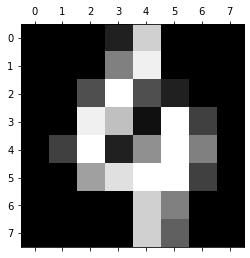

In [5]:
plt.gray() 
plt.matshow(digits.images[100])
plt.show()

Is it a 4? Let’s print out the target label at index 100 to find out.

In [6]:
print(digits.target[100])

4


4 it is. Let's take a look at 64 sample images. 

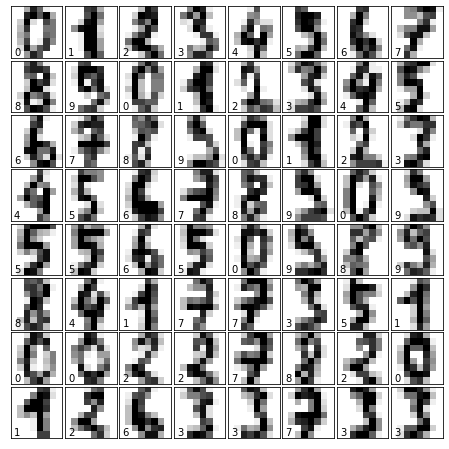

In [7]:
# Figure size (width, height)
fig = plt.figure(figsize=(6, 6))
 
# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
 
plt.show()

## K-Means++ Clustering

Now we understand what we are working with. Let’s cluster the 1797 different digit images into groups.
There are 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), so there should be 10 clusters.

In [8]:
# Instantiate model
model = KMeans(init="k-means++", n_clusters=10, random_state=2)
# Train model
model.fit(digits.data)

KMeans(n_clusters=10, random_state=2)

Now we have our centroids - central values of the clusters. There are 10 of them and each one is a list with 64 values (0-16).

In [9]:
model.cluster_centers_.shape

(10, 64)

In [10]:
model.cluster_centers_[1]

array([0.00000000e+00, 1.95219124e-01, 6.45816733e+00, 1.24701195e+01,
       1.18725100e+01, 5.71713147e+00, 6.85258964e-01, 7.96812749e-03,
       3.98406375e-03, 2.58167331e+00, 1.39601594e+01, 9.26693227e+00,
       9.44223108e+00, 1.04780876e+01, 1.36254980e+00, 3.98406375e-03,
       1.30104261e-18, 4.27888446e+00, 1.28605578e+01, 4.49402390e+00,
       6.89641434e+00, 1.11513944e+01, 1.90039841e+00, 0.00000000e+00,
       4.33680869e-19, 2.31872510e+00, 1.04143426e+01, 1.17848606e+01,
       1.31713147e+01, 1.20398406e+01, 2.44621514e+00, 8.67361738e-19,
       0.00000000e+00, 2.98804781e-01, 3.18326693e+00, 6.17529880e+00,
       6.86852590e+00, 1.12151394e+01, 4.21513944e+00, 0.00000000e+00,
       3.46944695e-18, 2.31075697e-01, 2.37051793e+00, 1.97609562e+00,
       1.80079681e+00, 1.09800797e+01, 6.35059761e+00, 1.59362550e-02,
       3.46944695e-18, 7.88844622e-01, 8.13147410e+00, 5.66533865e+00,
       4.79681275e+00, 1.22111554e+01, 5.95219124e+00, 1.11553785e-01,
      

Let’s visualize these centroids. Considering data samples live in a 64-dimensional space - centroids have values, so they can be images.

## Visualizing Centroids

We'll make each of the cluster centers into a 8x8 2D array and put indexes on each image in the bottom left corner. 

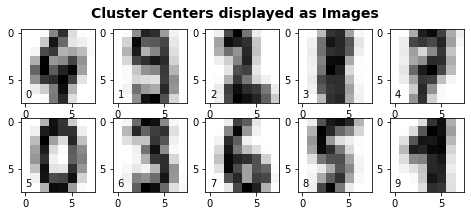

In [11]:
def ten_digits(img_data, title):
    fig = plt.figure(figsize=(8,3))
    for i in range(10):
        # Initialize subplots in a grid of 2X5, at i+1th position
        ax=fig.add_subplot(2,5, 1 + i)
        # Display images
        ax.imshow(img_data[i].reshape((8, 8)), cmap=plt.cm.binary)
        # Label the image with 
        ax.text(0, 7, str(i))
    # Add title
    fig.suptitle(title, fontsize=14, fontweight='bold')
    return plt.show()

ten_digits(model.cluster_centers_, title='Cluster Centers displayed as Images')

Result: These are the centroids of handwriting from thirty different people collected by Bogazici University (Istanbul, Turkey). Now we can interpret the values coded within these centroids and make labels out of them.  

    Image under index 0 looks like 4
    Image under index 1 looks like 9
    Image under index 2 looks like 2
    Image under index 3 looks like 8
    Image under index 4 looks like 7
    Image under index 5 looks like 0
    Image under index 6 looks like 3
    Image under index 7 looks like 6
    Image under index 8 looks like 5
    Image under index 9 looks like 1

Now let's map centroids' indexes to real digits to display predicted results not as indexes, but as digits each centroid represents. 

In [12]:
img_map = {
    0: 4, # centroid's index: digit centroid represents
    1: 9,
    2: 2,
    3: 8,
    4: 7,
    5: 0,
    6: 3,
    7: 6,
    8: 5,
    9: 1,
}

## Extrinsic testing simulation

Let's create test 2 batches of images in Paint: 
- `best_img`, where I'll write digits again and again till model recognizes them correctly - Conformistic Approach;
- `sloppy_img`, where I'll write digits good enough for people to understand, but may be not good enough for model to do so - Nonconformistic Approach. 

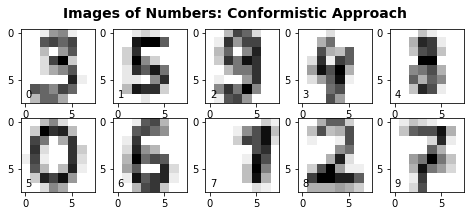

In [13]:
# Load images, convert RGB to grayscale and resize them to 8x8
def load_images(paths):
    imgs = [ImageOps.invert(Image.open(path).convert('L')).resize((8,8)) for path in paths]
    # Convert PIL images to 1d arrays of 16 color pixels
    img_data = [np.rint(np.array(img.getdata()) / 16) for img in imgs]
    return img_data
# List files for loading
best_img = load_images(['3.png', '5.png', '9.png', '4.png', '8.png', '0.png', '6.png', '1.png', '2.png', '7.png'])

# Draw resized images as plots
ten_digits(best_img, title='Images of Numbers: Conformistic Approach')

In [14]:
[img_map[v] for v in model.predict(best_img)]

[3, 5, 9, 4, 8, 0, 6, 1, 2, 7]

Result: I've spent about 40 minutes to make sure every digit is recognizable by model - wasn't an easy task!

Now I'll write digits without a goal to be understood by model.

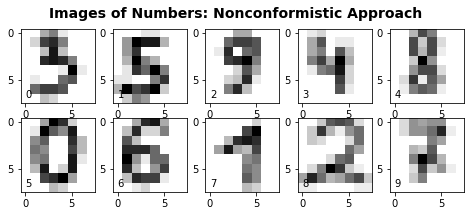

In [15]:
# List files for upload
sloppy_img = load_images(['3.3.png', '5.5.png', '9.9.png', '4.4.png', '8.8.png', '0.0.png', '6.6.png', '1.1.png', '2.2.png', '7.7.png'])

# Draw resized images as plots
ten_digits(sloppy_img, title='Images of Numbers: Nonconformistic Approach')

In [16]:
[img_map[v] for v in model.predict(sloppy_img)]

[5, 5, 7, 7, 8, 0, 5, 1, 7, 7]

## Conclusion

We have created the K-Means++ model that clusters images of handwritten digits and tested it on 2 batches of digits, handwritten in Paint.

First batch was an attempt to play according to model's rules of perception - Conformistic Approach. In this scenario I had to rewrite every digit 3-8 times to get a correct result of prediction.

Second batch was a collection of digits created mainly on the 1st attempt and looking good enough for people to understand them correctly - Nonconformistic Approach. Model guessed correctly only 4 of them: `8, 0, 1, 7`.

There could be 2 reasons for such poor interpretation results:

1. This dataset is far from exhaustive when it comes to handwriting: there are digits, written by only 30 people there. 
2. The conversion and resize methods are not perfect for the task: it seems, they distort images in a way that makes them less interpretable by model.



